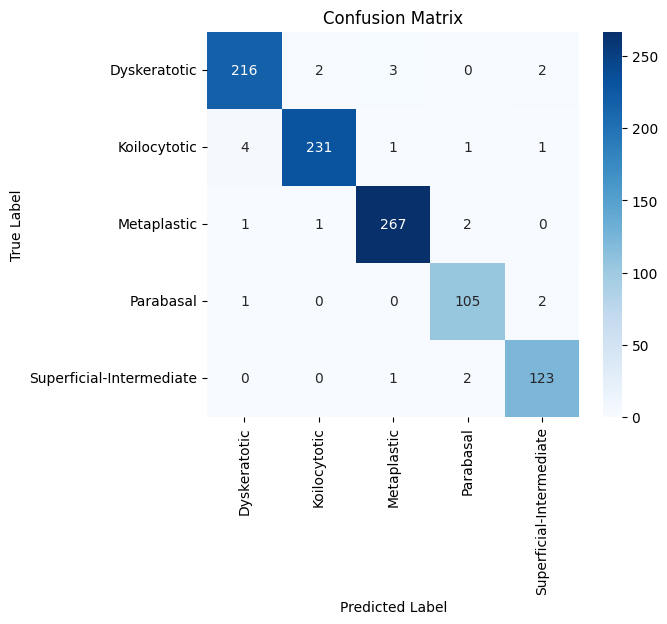

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize

# Define class labels
class_labels = [
    "Dyskeratotic", "Koilocytotic", "Metaplastic", 
    "Parabasal", "Superficial-Intermediate"
]

# Given support values (number of samples per class)
support = np.array([223, 238, 271, 108, 126])

# Given recall values
recall = np.array([0.9686, 0.9664, 0.9852, 0.9537, 0.9762])

# Compute correctly classified samples per class
correctly_classified = np.round(recall * support).astype(int)

# Compute misclassified samples
misclassified = support - correctly_classified

# Initialize y_true and y_pred arrays
y_true = []
y_pred = []

# Assign correct and incorrect predictions
for i in range(len(class_labels)):
    # Correctly classified labels
    y_true.extend([i] * support[i])  # True labels
    y_pred.extend([i] * correctly_classified[i])  # Correct predictions
    
    # Misclassified samples distributed randomly
    misclassified_labels = np.random.choice(len(class_labels), misclassified[i], replace=True)
    y_pred.extend(misclassified_labels)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Validate correct length
assert len(y_true) == len(y_pred), "Mismatch in true and predicted label lengths!"

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [2]:
cm

array([[216,   2,   3,   0,   2],
       [  4, 231,   1,   1,   1],
       [  1,   1, 267,   2,   0],
       [  1,   0,   0, 105,   2],
       [  0,   0,   1,   2, 123]], dtype=int64)

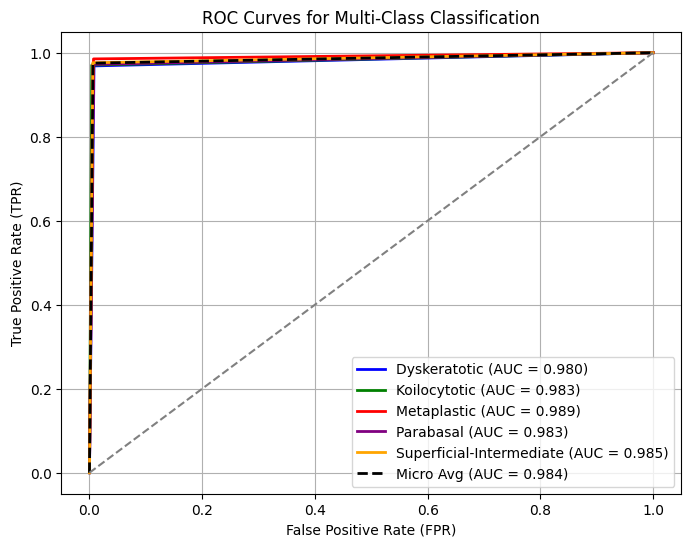

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3, 4])

# Define colors for different classes
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the ROC plot
plt.figure(figsize=(8, 6))

# Loop through each class and plot its ROC curve
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{class_labels[i]} (AUC = {roc_auc:.3f})')

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(fpr_micro, tpr_micro, linestyle='--', color='black', lw=2, label=f'Micro Avg (AUC = {roc_auc_micro:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Multi-Class Classification")

plt.legend(loc="lower right")
plt.grid(True)
plt.show()
